## Import data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.shape, test.shape

((7613, 5), (3263, 4))

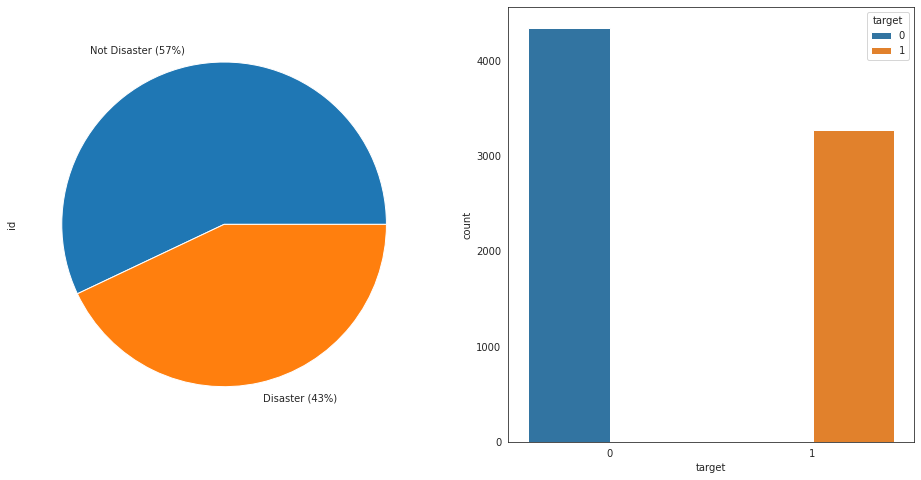

In [19]:
target_count = train.groupby('target').count()['id']
with sns.axes_style("white"):
    fig, axes = plt.subplots(ncols = 2, figsize= (16, 8))
    target_count.plot(kind="pie", labels=['Not Disaster (57%)', 'Disaster (43%)'], ax= axes[0]) 
    sns.countplot(x=train['target'], hue=train['target'], ax= axes[1])


## Fill null values

In [5]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [50]:
train["keyword"].fillna("no_keyword", inplace = True)
train["location"].fillna("no_location", inplace = True)
test["keyword"].fillna("no_keyword", inplace = True)
test["location"].fillna("no_location", inplace = True)

In [51]:
print(f'Number of unique values in keyword = {train["keyword"].nunique()} (Training) - {test["keyword"].nunique()} (Test)')
print(f'Number of unique values in location = {train["location"].nunique()} (Training) - {test["location"].nunique()} (Test)')

Number of unique values in keyword = 222 (Training) - 222 (Test)
Number of unique values in location = 3342 (Training) - 1603 (Test)


In [52]:
train["keyword"] = train["keyword"].str.replace("%20", "_")
test["keyword"] = test["keyword"].str.replace("%20", "_")

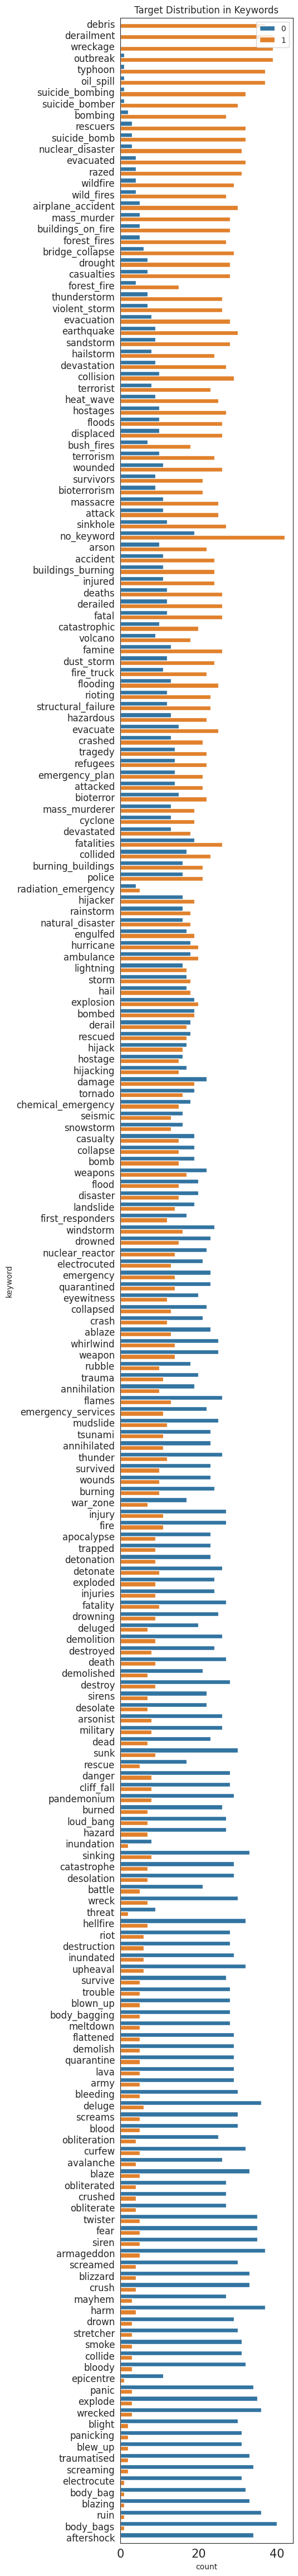

In [43]:
train['target_mean'] = train.groupby('keyword')['target'].transform('mean')
with sns.axes_style("white"):
    g = plt.figure(figsize=(4, 60), dpi=100)
    g = sns.countplot(y=train.sort_values(by='target_mean', ascending=False)['keyword'], hue=train.sort_values(by='target_mean', ascending=False)['target'])
    g = plt.tick_params(axis='x', labelsize=15)
    g = plt.tick_params(axis='y', labelsize=12)
    g = plt.legend(loc=1)
    g = plt.title('Target Distribution in Keywords')
train.drop(columns=['target_mean'], inplace=True)


In [53]:
train.drop("id", axis = 1, inplace = True)
train.drop("location", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)
test.drop("location", axis = 1, inplace = True)

## Export data

In [46]:
train.to_csv("../input/explore_train.csv", index = False)

In [54]:
test.to_csv("../input/explore_test.csv", index = False)